In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("sales_data.csv",encoding="latin-1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df2=df.select_dtypes(exclude=["object"])

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   MSRP             2823 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 198.6 KB


In [6]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df2)

In [7]:
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

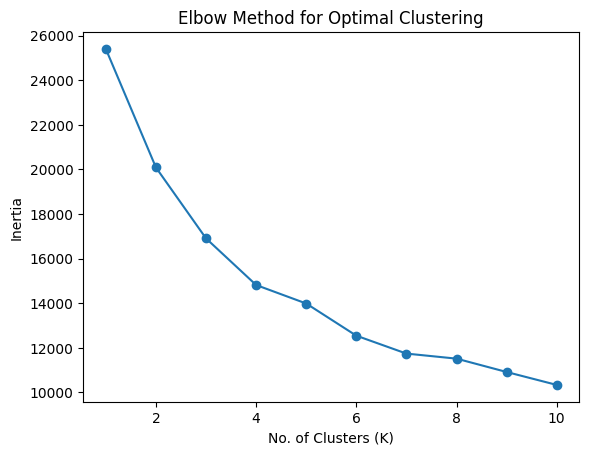

In [8]:
plt.plot(range(1,11),inertia,marker="o")
plt.xlabel("No. of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clustering")
plt.show()

In [9]:
optimal_clusters=4
kmeans=KMeans(n_clusters=optimal_clusters,random_state=0)
pred=kmeans.fit_predict(scaled_data)
print(pred)

[2 2 2 ... 1 1 1]


In [12]:
# Add the cluster labels to the original DataFrame
df2['Cluster'] = pred

# Display the first few rows of the DataFrame with cluster labels
print(df2.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  \
0        10107               30      95.70                2  2871.00       1   
1        10121               34      81.35                5  2765.90       2   
2        10134               41      94.74                2  3884.34       3   
3        10145               45      83.26                6  3746.70       3   
4        10159               49     100.00               14  5205.27       4   

   MONTH_ID  YEAR_ID  MSRP  Cluster  
0         2     2003    95        2  
1         5     2003    95        2  
2         7     2003    95        2  
3         8     2003    95        3  
4        10     2003    95        3  


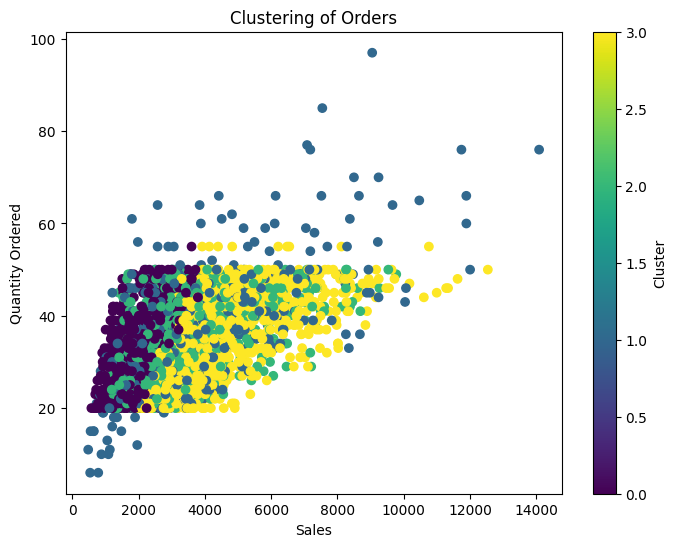

In [13]:
# Plot the data with clusters colored differently
plt.figure(figsize=(8, 6))
plt.scatter(df2['SALES'], df2['QUANTITYORDERED'], c=df2['Cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Quantity Ordered')
plt.title('Clustering of Orders')
plt.colorbar(label='Cluster')
plt.show()


In [16]:
# Print unique values in the 'Cluster' column
unique_clusters = df2['Cluster'].unique()
print(unique_clusters)


[2 3 0 1]


In [17]:
# Group by cluster and calculate the mean of each feature
cluster_summary = df2.groupby('Cluster').mean()

# Display the cluster summary
print(cluster_summary)


          ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
Cluster                                                              
0        10246.569252        33.059557  61.538130         6.696676   
1        10392.297071        36.884937  83.445251         5.972803   
2        10182.805471        35.188450  87.544271         6.349544   
3        10253.423834        35.661140  97.664850         6.617617   

               SALES    QTR_ID  MONTH_ID      YEAR_ID        MSRP  
Cluster                                                            
0        2010.391413  3.455679  9.355956  2003.580332   65.229917  
1        3747.880146  1.368201  3.002092  2005.000000  100.167364  
2        3638.093769  1.484802  3.364742  2003.579027  104.455927  
3        4555.206052  3.674611  9.966839  2003.564767  124.986528  
